# Import all desired modules and functions

In [21]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
from pandas.plotting import autocorrelation_plot, lag_plot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import datetime
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Developed Functions

In [22]:
def byebye(label,measurement):
    if measurement in label:
        label.remove(measurement)

In [23]:
def location(sensor):
    if sensor == 'RECORD':
        return sensor
    label = sensor.split('_')
    byebye(label,'Temp')
    byebye(label,'Avg')
    byebye(label,'Max')
    byebye(label,'Min')
    structural_element = label[0]
    if str(structural_element)[0] == 'G':
        vertical_line = label[1]
        if len(label) == 2:
            return structural_element, vertical_line
        flange_or_web = label[2]
        if len(label) == 3:
            return structural_element, vertical_line, flange_or_web
        elif len(label) == 4:
            part = label[3]
            return structural_element, vertical_line, flange_or_web, part
        else:
            return 'Error'
    elif str(structural_element) == 'P':
        girder = label[1]
        side = label[2]
        portion = label[3]
        return structural_element, girder, side, portion
    else:
        horizontal_line = label[1]
        vertical_line = label[2]
        vertical_orientation = label[3]
        horizontal_orientation = label[4]
        return structural_element, horizontal_line, vertical_line, vertical_orientation, horizontal_orientation

In [24]:
def specify(data,stat):
    sensors = data.columns
    specific_sensors = []
    
    for sensor in sensors:
        label = sensor.split('_')
        if stat in label:
            specific_sensors.append(sensor)
    
    specific_data = data.loc[:,specific_sensors]
    
    specific_columns = []
    
    for column in specific_data.columns:
        specific_column = column[0:-(len(stat)+1)]
        specific_columns.append(specific_column)
    
    specific_data.columns = specific_columns
    
    return specific_data

In [25]:
def consider(data,stat):
    sensors = data.columns
    specific_sensors = []
    
    for sensor in sensors:
        label = sensor.split('_')
        if stat in label:
            specific_sensors.append(sensor)
    
    specific_data = data.loc[:,specific_sensors]
    
    return specific_data

# Read data into memory

In [26]:
# prints current working directory full path
os.getcwd

<function nt.getcwd()>

## Copy/paste the name of the latest data file into code

In [27]:
beast_data = pd.read_csv('CR6Series-BEASToffice_AVG_DATA as of 2019-11-24.csv', index_col = 0, header = 1, skiprows = [2,3])
beast_data.index = pd.to_datetime(beast_data.index)

In [28]:
last_recording = pd.DataFrame(beast_data.iloc[-1,:]).transpose()
timestamp_last_recording = pd.to_datetime(last_recording.index)[0]
timestamp_last_recording

Timestamp('2019-11-24 22:42:00')

## All of the raw data is presented here (displacement, pressure, temperature)

In [29]:
recent_data = beast_data.loc['2019-11-18 09:00:00':timestamp_last_recording,:]

recent_data

,RECORD,G1_L2_W_Avg,G1_L2_F_I_Avg,G1_L2_F_E_Avg,G1_L4_W_Avg,G1_L4_F_M_Avg,G2_L2_W_Avg,G2_L2_F_M_Avg,G2_L4_W_Avg,G2_L4_F_M_Avg,...,D_H6_L2_T_T_Temp_Avg,D_H6_L2_B_L_Temp_Avg,D_H6_L2_B_T_Temp_Avg,D_H6_L4_T_L_Temp_Avg,D_H6_L4_T_T_Temp_Avg,D_H6_L4_B_L_Temp_Avg,D_H6_L4_B_T_Temp_Avg,D_H7_L1_T_L_Temp_Avg,D_H7_L2_T_L_Temp_Avg,D_H7_L4_T_L_Temp_Avg
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2019-11-18 09:00:00,20012,1955.53,2695.66,2454.14,2689.7,2018.09,2401.84,2632.64,2083.97,2350.76,...,39.34,39.61,39.83,40.12,40.23,40.54,40.2,39.99,39.87,40.02
2019-11-18 09:03:00,20013,1955.53,2695.66,2454.14,2689.7,2018.1,2401.84,2632.64,2083.97,2350.76,...,39.35,39.62,39.83,40.12,40.23,40.54,40.2,39.99,39.88,40.02
2019-11-18 09:06:00,20014,1955.53,2695.67,2454.14,2689.71,2018.1,2401.85,2632.64,2083.98,2350.77,...,39.35,39.62,39.83,40.12,40.24,40.55,40.2,40,39.88,40.03
2019-11-18 09:09:00,20015,1955.53,2695.67,2454.15,2689.71,2018.11,2401.85,2632.64,2083.98,2350.77,...,39.36,39.62,39.84,40.13,40.24,40.55,40.21,40,39.88,40.03
2019-11-18 09:12:00,20016,1955.53,2695.67,2454.15,2689.71,2018.11,2401.86,2632.64,2083.99,2350.78,...,39.36,39.63,39.84,40.13,40.25,40.55,40.21,40,39.89,40.03
2019-11-18 09:15:00,20017,1955.53,2695.67,2454.16,2689.71,2018.12,2401.86,2632.65,2083.99,2350.78,...,39.36,39.63,39.85,40.13,40.25,40.56,40.21,40.01,39.89,40.04
2019-11-18 09:18:00,20018,1955.53,2695.68,2454.16,2689.71,2018.12,2401.86,2632.65,2083.99,2350.78,...,39.37,39.63,39.85,40.14,40.25,40.56,40.22,40.01,39.89,40.04
2019-11-18 09:21:00,20019,1955.53,2695.68,2454.16,2689.72,2018.13,2401.86,2632.65,2084,2350.79,...,39.37,39.64,39.85,40.14,40.26,40.56,40.22,40.01,39.9,40.04
2019-11-18 09:24:00,20020,1955.53,2695.68,2454.16,2689.72,2018.13,2401.86,2632.65,2084,2350.79,...,39.38,39.64,39.86,40.14,40.26,40.57,40.22,40.02,39.9,40.04


### Zero Values

In [30]:
zero_data = pd.read_csv('Zero Values.csv', index_col = 0, header = 0)
zero_data = zero_data.dropna(how = 'all')
zero_data = zero_data.dropna(axis=1, how='all')
zero_data

,G1_L2_W_Avg,G1_L2_F_I_Avg,G1_L2_F_E_Avg,G1_L4_W_Avg,G1_L4_F_M_Avg,G2_L2_W_Avg,G2_L2_F_M_Avg,G2_L4_W_Avg,G2_L4_F_M_Avg,G3_L2_W_Avg,...,G1_L4_DI_Min,G2_L1_DI_Min,G2_L2_DI_Min,G2_L4_DI_Min,G3_L1_DI_Min,G3_L2_DI_Min,G3_L4_DI_Min,G4_L1_DI_Min,G4_L2_DI_Min,G4_L4_DI_Min
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
Zero Values,1755.653,2249.154,2051.495,2568.768,1818.033,2293.961,2290.663,2011.927,2109.602,2616.031,...,2.64,2.56,2.63,2.47,3.93,1.97,2.3,2.67,2.48,2.16


#### Data Organization Operations

In [31]:
headers = list(recent_data.columns)
temp_headers = []
strain_headers = []
pressure_headers = []
for header in headers:
    identity = header.split('_')
    if "RECORD" in identity:
        continue
    elif "Temp" in identity:
        temp_headers.append(header)
    elif "Pres" in identity:
        pressure_headers.append(header)
    else:
        strain_headers.append(header)

temp_data = recent_data.loc[:,temp_headers]
disp_data = recent_data.loc[:,strain_headers]
pres_data = recent_data.loc[:,pressure_headers]

### Displacement Data

In [32]:
disp_data

,G1_L2_W_Avg,G1_L2_F_I_Avg,G1_L2_F_E_Avg,G1_L4_W_Avg,G1_L4_F_M_Avg,G2_L2_W_Avg,G2_L2_F_M_Avg,G2_L4_W_Avg,G2_L4_F_M_Avg,G3_L2_W_Avg,...,G2_L2_DI_Min,G2_L4_DI_Min,G3_L1_DI_Min,G3_L2_DI_Min,G3_L4_DI_Min,G4_L1_DI_Min,G4_L2_DI_Min,G4_L4_DI_Min,G1_Exp_Min,G4_Exp_Min
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2019-11-18 09:00:00,1955.53,2695.66,2454.14,2689.7,2018.09,2401.84,2632.64,2083.97,2350.76,2717.35,...,0.0309986,0.122187,NAN,-0.0159279,-0.0282533,0.137711,0.0243582,-0.077678,2.64093,3.40688
2019-11-18 09:03:00,1955.53,2695.66,2454.14,2689.7,2018.1,2401.84,2632.64,2083.97,2350.76,2717.35,...,0.0305833,0.122298,NAN,-0.0156942,-0.0272566,0.136435,0.024354,-0.0774825,2.66343,3.44765
2019-11-18 09:06:00,1955.53,2695.67,2454.14,2689.71,2018.1,2401.85,2632.64,2083.98,2350.77,2717.35,...,0.0312462,0.122119,NAN,-0.0164406,-0.02739,0.136771,0.024354,-0.0773255,2.65038,3.44542
2019-11-18 09:09:00,1955.53,2695.67,2454.15,2689.71,2018.11,2401.85,2632.64,2083.98,2350.77,2717.36,...,0.0309989,0.122604,NAN,-0.016001,-0.02759,0.13623,0.0243585,-0.0776359,2.62772,3.42064
2019-11-18 09:12:00,1955.53,2695.67,2454.15,2689.71,2018.11,2401.86,2632.64,2083.99,2350.78,2717.36,...,0.0309121,0.12166,NAN,-0.0163276,-0.0266464,0.13673,0.0243621,-0.0775883,2.64013,3.42207
2019-11-18 09:15:00,1955.53,2695.67,2454.16,2689.71,2018.12,2401.86,2632.65,2083.99,2350.78,2717.36,...,0.0311653,0.12231,NAN,-0.0159217,-0.0286103,0.136353,0.0243582,-0.0777479,2.63935,3.41373
2019-11-18 09:18:00,1955.53,2695.68,2454.16,2689.71,2018.12,2401.86,2632.65,2083.99,2350.78,2717.36,...,0.0308752,0.122493,NAN,-0.0164943,-0.0267164,0.137108,0.0243521,-0.077319,2.65186,3.43003
2019-11-18 09:21:00,1955.53,2695.68,2454.16,2689.72,2018.13,2401.86,2632.65,2084,2350.79,2717.36,...,0.0309652,0.122197,NAN,-0.0157637,-0.0263836,0.137488,0.0243514,-0.0774032,2.64776,3.43385
2019-11-18 09:24:00,1955.53,2695.68,2454.16,2689.72,2018.13,2401.86,2632.65,2084,2350.79,2717.36,...,0.0308678,0.12247,NAN,-0.0154074,-0.0269307,0.136484,0.0243582,-0.0771989,2.65109,3.44763


## Temperature Data

In [33]:
temp_data = specify(temp_data,'Avg')
temp_data = specify(temp_data,'Temp')
temp_data

,G1_L2_W,G1_L2_F_I,G1_L2_F_E,G1_L4_W,G1_L4_F_M,G2_L2_W,G2_L2_F_M,G2_L4_W,G2_L4_F_M,G3_L2_W,...,D_H6_L2_T_T,D_H6_L2_B_L,D_H6_L2_B_T,D_H6_L4_T_L,D_H6_L4_T_T,D_H6_L4_B_L,D_H6_L4_B_T,D_H7_L1_T_L,D_H7_L2_T_L,D_H7_L4_T_L
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2019-11-18 09:00:00,40.24,40.68,40.45,40.62,40.17,40.57,40.55,40.72,40.61,40.16,...,39.34,39.61,39.83,40.12,40.23,40.54,40.2,39.99,39.87,40.02
2019-11-18 09:03:00,40.24,40.68,40.45,40.63,40.18,40.58,40.55,40.72,40.62,40.17,...,39.35,39.62,39.83,40.12,40.23,40.54,40.2,39.99,39.88,40.02
2019-11-18 09:06:00,40.24,40.68,40.46,40.63,40.19,40.58,40.55,40.72,40.62,40.17,...,39.35,39.62,39.83,40.12,40.24,40.55,40.2,40,39.88,40.03
2019-11-18 09:09:00,40.25,40.68,40.46,40.63,40.19,40.58,40.56,40.73,40.62,40.17,...,39.36,39.62,39.84,40.13,40.24,40.55,40.21,40,39.88,40.03
2019-11-18 09:12:00,40.25,40.69,40.46,40.64,40.19,40.59,40.56,40.73,40.63,40.18,...,39.36,39.63,39.84,40.13,40.25,40.55,40.21,40,39.89,40.03
2019-11-18 09:15:00,40.25,40.69,40.47,40.64,40.19,40.59,40.56,40.74,40.63,40.18,...,39.36,39.63,39.85,40.13,40.25,40.56,40.21,40.01,39.89,40.04
2019-11-18 09:18:00,40.25,40.69,40.47,40.64,40.19,40.59,40.57,40.74,40.64,40.19,...,39.37,39.63,39.85,40.14,40.25,40.56,40.22,40.01,39.89,40.04
2019-11-18 09:21:00,40.26,40.7,40.47,40.65,40.2,40.6,40.57,40.74,40.64,40.19,...,39.37,39.64,39.85,40.14,40.26,40.56,40.22,40.01,39.9,40.04
2019-11-18 09:24:00,40.26,40.7,40.47,40.65,40.2,40.6,40.58,40.75,40.64,40.2,...,39.38,39.64,39.86,40.14,40.26,40.57,40.22,40.02,39.9,40.04


In [36]:
avg_disp_data = specify(disp_data,'Avg')
avg_disp_data

,G1_L2_W,G1_L2_F_I,G1_L2_F_E,G1_L4_W,G1_L4_F_M,G2_L2_W,G2_L2_F_M,G2_L4_W,G2_L4_F_M,G3_L2_W,...,G2_L2_DI,G2_L4_DI,G3_L1_DI,G3_L2_DI,G3_L4_DI,G4_L1_DI,G4_L2_DI,G4_L4_DI,G1_Exp,G4_Exp
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2019-11-18 09:00:00,1955.53,2695.66,2454.14,2689.7,2018.09,2401.84,2632.64,2083.97,2350.76,2717.35,...,0.0335469,0.12564,NAN,-0.0128218,-0.0216587,0.141278,0.0244848,-0.0749249,2.84822,3.55731
2019-11-18 09:03:00,1955.53,2695.66,2454.14,2689.7,2018.1,2401.84,2632.64,2083.97,2350.76,2717.35,...,0.0335471,0.125611,NAN,-0.0128118,-0.0216275,0.141331,0.0244855,-0.0749291,2.84851,3.55717
2019-11-18 09:06:00,1955.53,2695.67,2454.14,2689.71,2018.1,2401.85,2632.64,2083.98,2350.77,2717.35,...,0.0335486,0.125641,NAN,-0.0128563,-0.0216328,0.14129,0.0244848,-0.0749398,2.84877,3.55744
2019-11-18 09:09:00,1955.53,2695.67,2454.15,2689.71,2018.11,2401.85,2632.64,2083.98,2350.77,2717.36,...,0.033559,0.125626,NAN,-0.0128402,-0.0216495,0.141246,0.0244893,-0.0749426,2.84542,3.5548
2019-11-18 09:12:00,1955.53,2695.67,2454.15,2689.71,2018.11,2401.86,2632.64,2083.99,2350.78,2717.36,...,0.0335581,0.125601,NAN,-0.0128327,-0.021616,0.1413,0.0244896,-0.0749265,2.84582,3.55473
2019-11-18 09:15:00,1955.53,2695.67,2454.16,2689.71,2018.12,2401.86,2632.65,2083.99,2350.78,2717.36,...,0.0335454,0.125627,NAN,-0.0128128,-0.0216305,0.14131,0.0244819,-0.074901,2.84973,3.55931
2019-11-18 09:18:00,1955.53,2695.68,2454.16,2689.71,2018.12,2401.86,2632.65,2083.99,2350.78,2717.36,...,0.0335568,0.125615,NAN,-0.0127976,-0.0216436,0.141325,0.0244871,-0.0749253,2.8483,3.55758
2019-11-18 09:21:00,1955.53,2695.68,2454.16,2689.72,2018.13,2401.86,2632.65,2084,2350.79,2717.36,...,0.0335411,0.125596,NAN,-0.0127977,-0.0215866,0.141268,0.0244856,-0.0749379,2.85688,3.56606
2019-11-18 09:24:00,1955.53,2695.68,2454.16,2689.72,2018.13,2401.86,2632.65,2084,2350.79,2717.36,...,0.0335901,0.125645,NAN,-0.0128328,-0.0216248,0.141286,0.02449,-0.0749295,2.84247,3.5515


# Develop a Mathematical Model for Thermal Expansion of the Steel Girders

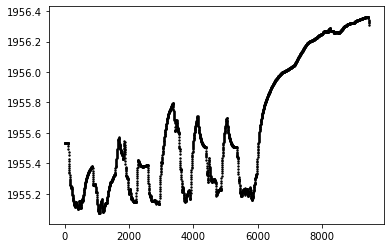

In [150]:
alpha = 7.2E-6
L0 = avg_disp_data['G1_L2_W'].iloc[0]
total_minutes = avg_disp_data['G1_L2_W'].count()*3
minutes = list(range(0,total_minutes,3))
lengths = [L0]
temps =  list(temp_data['G1_L2_W'])

for i in range(1,len(temps)):
    deltaL = alpha*(temps[i]-temps[i-1])*lengths[-1]
    L=lengths[-1]
    lengths.append(deltaL+L)
    
plt.scatter(minutes,lengths,s=2,c='k')

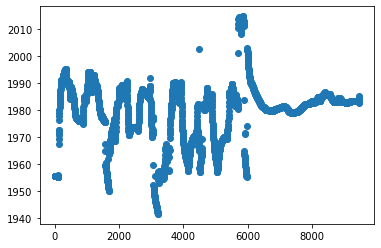

In [151]:
plt.scatter(minutes,avg_disp_data['G1_L2_W'])

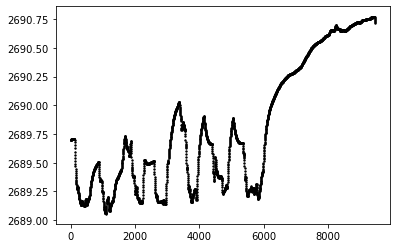

In [142]:
alpha = 7.2E-6
L0 = avg_disp_data['G1_L4_W'].iloc[0]
total_minutes = avg_disp_data['G1_L4_W'].count()*3
minutes = list(range(0,total_minutes,3))
lengths = [L0]
temps =  list(temp_data['G1_L4_W'])

for i in range(1,len(temps)):
    deltaL = alpha*(temps[i]-temps[i-1])*lengths[-1]
    L=lengths[-1]
    lengths.append(deltaL+L)
    
plt.scatter(minutes,lengths,s=2,c='k')


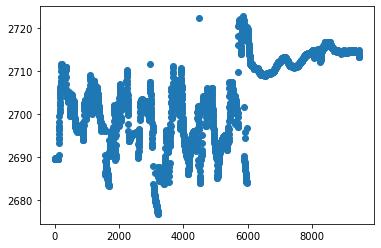

In [118]:
plt.scatter(minutes,avg_disp_data['G1_L4_W'])

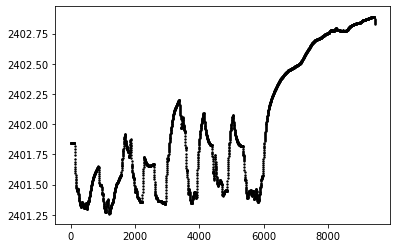

In [144]:
alpha = 7.2E-6
L0 = avg_disp_data['G2_L2_W'].iloc[0]
total_minutes = avg_disp_data['G2_L2_W'].count()*3
minutes = list(range(0,total_minutes,3))
lengths = [L0]
temps =  list(temp_data['G2_L2_W'])

for i in range(1,len(temps)):
    deltaL = alpha*(temps[i]-temps[i-1])*lengths[-1]
    L=lengths[-1]
    lengths.append(deltaL+L)
    
plt.scatter(minutes,lengths,s=2,c='k')


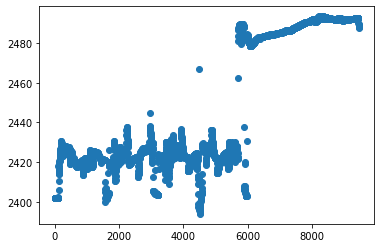

In [120]:
plt.scatter(minutes,avg_disp_data['G2_L2_W'])

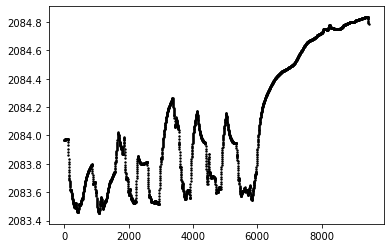

In [146]:
alpha = 7.2E-6
L0 = avg_disp_data['G2_L4_W'].iloc[0]
total_minutes = avg_disp_data['G2_L4_W'].count()*3
minutes = list(range(0,total_minutes,3))
lengths = [L0]
temps =  list(temp_data['G2_L4_W'])

for i in range(1,len(temps)):
    deltaL = alpha*(temps[i]-temps[i-1])*lengths[-1]
    L=lengths[-1]
    lengths.append(deltaL+L)
    
plt.scatter(minutes,lengths,s=2,c='k')


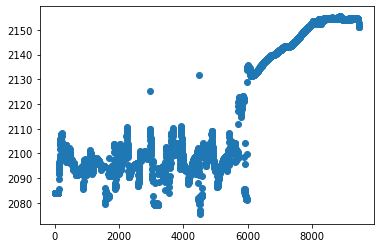

In [122]:
plt.scatter(minutes,avg_disp_data['G2_L4_W'])

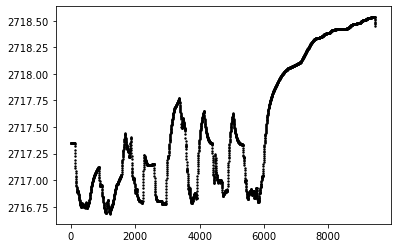

In [148]:
alpha = 7.2E-6
L0 = avg_disp_data['G3_L2_W'].iloc[0]
total_minutes = avg_disp_data['G3_L2_W'].count()*3
minutes = list(range(0,total_minutes,3))
lengths = [L0]
temps =  list(temp_data['G3_L2_W'])

for i in range(1,len(temps)):
    deltaL = alpha*(temps[i]-temps[i-1])*lengths[-1]
    L=lengths[-1]
    lengths.append(deltaL+L)
    
plt.scatter(minutes,lengths,s=2,c='k')


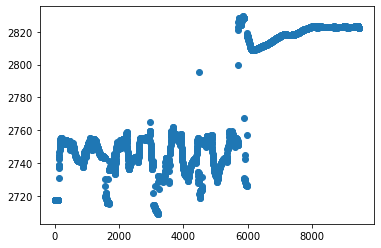

In [124]:
plt.scatter(minutes,avg_disp_data['G3_L2_W'])

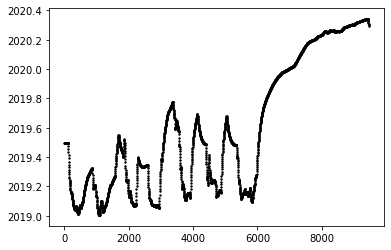

In [138]:
alpha = 7.2E-6
L0 = avg_disp_data['G3_L4_W'].iloc[0]
total_minutes = avg_disp_data['G3_L4_W'].count()*3
minutes = list(range(0,total_minutes,3))
lengths = [L0]
temps =  list(temp_data['G3_L4_W'])

for i in range(1,len(temps)):
    deltaL = alpha*(temps[i]-temps[i-1])*lengths[-1]
    L=lengths[-1]
    lengths.append(deltaL+L)
    
plt.scatter(minutes,lengths,s=2,c='k')

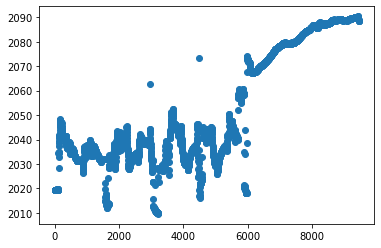

In [126]:
plt.scatter(minutes,avg_disp_data['G3_L4_W'])

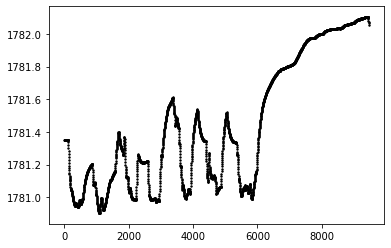

In [139]:
alpha = 7.2E-6
L0 = avg_disp_data['G4_L2_W'].iloc[0]
total_minutes = avg_disp_data['G4_L2_W'].count()*3
minutes = list(range(0,total_minutes,3))
lengths = [L0]
temps =  list(temp_data['G4_L2_W'])

for i in range(1,len(temps)):
    deltaL = alpha*(temps[i]-temps[i-1])*lengths[-1]
    L=lengths[-1]
    lengths.append(deltaL+L)
    
plt.scatter(minutes,lengths,s=2,c='k')

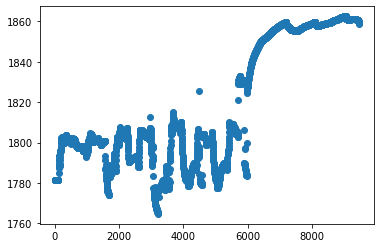

In [128]:
plt.scatter(minutes,avg_disp_data['G4_L2_W'])

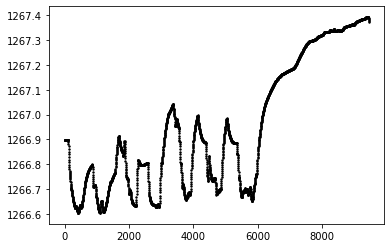

In [140]:
alpha = 7.2E-6
L0 = avg_disp_data['G4_L4_W'].iloc[0]
total_minutes = avg_disp_data['G4_L4_W'].count()*3
minutes = list(range(0,total_minutes,3))
lengths = [L0]
temps =  list(temp_data['G4_L4_W'])

for i in range(1,len(temps)):
    deltaL = alpha*(temps[i]-temps[i-1])*lengths[-1]
    L=lengths[-1]
    lengths.append(deltaL+L)
    
plt.scatter(minutes,lengths,s=2,c='k')

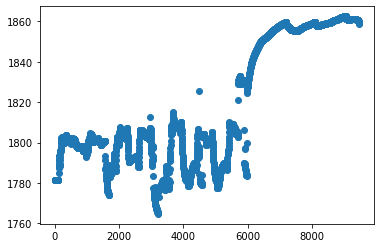

In [130]:
plt.scatter(minutes,avg_disp_data['G4_L2_W'])